# From data to network 1

## Packages

In [ ]:
# Example of calculating Euclidean distance
from math import sqrt
import networkx as nx

## Useful aplications

In [ ]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

## Data

In [ ]:
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

## Model

### K-NN

In [ ]:
# Locate the most similar neighbors
def KNN(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors


In [ ]:
neighbors = KNN(dataset, dataset[6], 3)
for neighbor in neighbors:
	print(neighbor)

[5.332441248, 2.088626775, 1]
[6.922596716, 1.77106367, 1]
[7.627531214, 2.759262235, 1]


### E-radious

In [ ]:
# Locate the most similar neighbors
def eradious(train, test_row,radious):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(len(distances)):
		if distances[i][1]<radious: neighbors.append(distances[i][0])
	return neighbors

In [ ]:
neighbors = eradious(dataset, dataset[7],2)

In [ ]:
for neighbor in neighbors:
	print(neighbor)

[6.922596716, 1.77106367, 1]
[7.627531214, 2.759262235, 1]
[5.332441248, 2.088626775, 1]
[7.673756466, 3.508563011, 1]


### Model with eradious and knn

In [ ]:
def modelo_final(train, test_row,radious,num_neighbors):
  neighbors = eradious(dataset, test_row,radious)
  if len(neighbors)<num_neighbors:
    neighbors = KNN(dataset, test_row,num_neighbors)
  return neighbors

In [ ]:
neighbors = modelo_final(dataset, dataset[7],2,3)
for neighbor in neighbors:
	print(neighbor)

[6.922596716, 1.77106367, 1]
[7.627531214, 2.759262235, 1]
[5.332441248, 2.088626775, 1]
[7.673756466, 3.508563011, 1]


## Network


In [ ]:
i=0
graph=list()
for datavector in dataset:
  neighbors=modelo_final(dataset, datavector,0.9,4)
  nei=list()
  for neighbor in neighbors:
    a=dataset.index(neighbor)
    nei.append([i,a])
  i=i+1
  graph=graph+nei
print(graph)

[[0, 0], [0, 4], [0, 1], [0, 3], [1, 1], [1, 3], [1, 0], [1, 4], [2, 2], [2, 4], [2, 0], [2, 1], [3, 3], [3, 1], [3, 0], [3, 4], [4, 4], [4, 0], [4, 2], [4, 1], [5, 5], [5, 9], [5, 7], [5, 6], [6, 6], [6, 7], [6, 5], [6, 4], [7, 7], [7, 5], [7, 6], [7, 9], [8, 8], [8, 7], [8, 5], [8, 9], [9, 9], [9, 5], [9, 7], [9, 6]]


In [ ]:
G = nx.Graph()
for g in graph:
  G.add_edge(g[0], g[1])

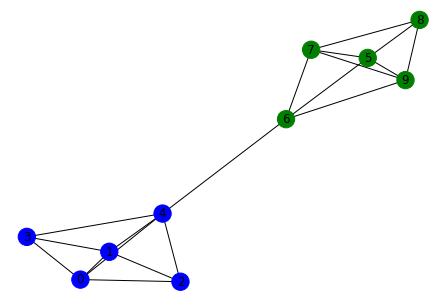

In [ ]:
color_map = []
for node in G:
    if dataset[node][2]==0:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)